In [1]:
from randomRaceModel import F1RaceResultsGetter
from randomRaceModel import F1RaceRandomModel

import statistics
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

from python import *

In [2]:
#Year, Season
seasonsData = None
#RaceId, List of tuples of (driverId, constructorId, time)
raceResultsData = None

with open('data/raceSeasonsData.pickle', 'rb') as handle:
    seasonsData = pickle.load(handle)
    
with open('data/raceResultsData.pickle', 'rb') as handle:
    raceResultsData = pickle.load(handle)
    
resultsGetter = F1RaceResultsGetter(seasonsData, raceResultsData)
randomModel = F1RaceRandomModel(seasonsData, raceResultsData)


In [3]:
randomPredictions = randomModel.constructPredictions()
results = resultsGetter.constructRaceResults()

In [4]:
randomModelErrors = []
for i, res in enumerate(results):
    raceRandomErrs = []
    for pos, driver_id in enumerate(results[i]):
        randomModel_pos = randomPredictions[i].index(driver_id)
        raceRandomErrs.append(abs(pos - randomModel_pos))
    randomModelErrors.append(sum(raceRandomErrs))

        
print('Random model MAE: {}'.format(statistics.mean(randomModelErrors)))

print('Random model MedianAE: {}'.format(statistics.median(randomModelErrors)))
randomModelErrors = []

for i, res in enumerate(results):
    raceRandomErrs = []

    for pos, driver_id in enumerate(results[i]):
        randomModel_pos = randomPredictions[i].index(driver_id)
        raceRandomErrs.append(abs(pos - randomModel_pos))

    randomModelErrors.append(sum(raceRandomErrs))

print('Random model MAE: {}'.format(statistics.mean(randomModelErrors)))
print('Random model MedianAE: {}'.format(statistics.median(randomModelErrors)))


Random model MAE: 144.60479041916167
Random model MedianAE: 145.0
Random model MAE: 144.60479041916167
Random model MedianAE: 145.0


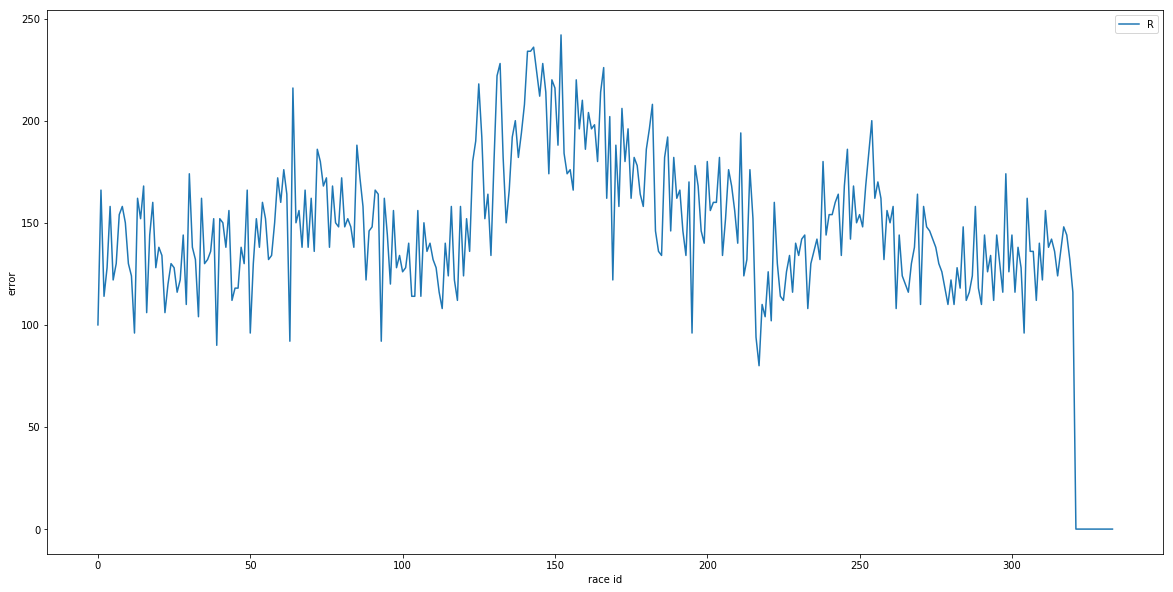

In [8]:
plt.figure(figsize=(20,10))
plt.xlabel('race id')
plt.ylabel('error')
plt.plot(randomModelErrors)
plt.legend("Random model")
plt.show()